In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer

In [93]:
data = pd.read_csv('stroke_data.csv')
data.sample(10)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3388,3388,52679,Female,82.0,NaN,0.0,Yes,Self-employed,Rural,78.00,31.3,formerly smoked,0
1356,1356,56166,Female,30.0,0.0,0.0,Yes,Govt_job,Rural,62.25,33.7,never smoked,0
1552,1552,24567,Male,51.0,0.0,0.0,Yes,Self-employed,Urban,69.18,35.7,smokes,0
399,399,15528,Male,58.0,NaN,0.0,Yes,Private,Rural,223.36,41.5,formerly smoked,0
1797,1797,54946,Female,26.0,0.0,0.0,No,Private,Urban,168.15,22.9,never smoked,0
4469,4469,22151,Female,28.0,0.0,0.0,No,Govt_job,Rural,77.99,32.0,smokes,0
4451,4451,6472,Female,78.0,0.0,0.0,Yes,Govt_job,Urban,101.76,NaN,smokes,0
1355,1355,28716,Female,74.0,0.0,0.0,Yes,Self-employed,Rural,94.67,19.7,Unknown,0
4003,4003,46141,Female,24.0,0.0,0.0,No,Private,Rural,147.74,21.4,Unknown,0
4142,4142,66306,Female,43.0,0.0,0.0,Yes,Private,Rural,82.57,29.1,never smoked,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       4380 non-null   float64
 5   heart_disease      4716 non-null   float64
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     4599 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 519.1+ KB


In [95]:
data.isna().sum()

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

In [96]:
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4315,Female,28.0,0.0,0.0,Yes,Private,Urban,100.80,39.3,formerly smoked,0
1767,Male,10.0,0.0,0.0,No,children,Urban,91.98,16.4,Unknown,0
1843,Male,77.0,0.0,0.0,Yes,Private,Urban,222.85,29.4,formerly smoked,0
4564,Female,52.0,NaN,0.0,Yes,Private,Urban,83.84,35.0,Unknown,0
4708,Female,78.0,0.0,0.0,Yes,Self-employed,Urban,234.06,33.7,never smoked,0
1532,Female,59.0,0.0,0.0,Yes,Private,Rural,79.18,52.8,formerly smoked,0
870,Male,49.0,0.0,0.0,Yes,Private,Rural,102.47,29.3,NaN,0
3495,Female,61.0,0.0,0.0,Yes,Self-employed,Urban,75.46,29.3,formerly smoked,0
4291,Female,54.0,NaN,0.0,Yes,Govt_job,Rural,228.26,46.0,never smoked,0
5010,Female,72.0,0.0,0.0,Yes,Self-employed,Urban,74.17,35.5,NaN,0


In [97]:
grouped_data = data.groupby(by=['Residence_type', 'work_type']).size().reset_index(name='count')
grouped_data

,Residence_type,work_type,count
0,Rural,Govt_job,312
1,Rural,Never_worked,7
2,Rural,Private,1462
3,Rural,Self-employed,393
4,Rural,children,340
5,Urban,Govt_job,345
6,Urban,Never_worked,15
7,Urban,Private,1463
8,Urban,Self-employed,426
9,Urban,children,347


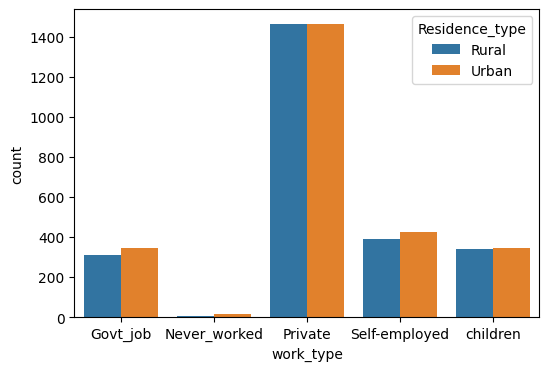

In [98]:
plt.figure(figsize=(6, 4))
sns.barplot(data=grouped_data, x='work_type', y='count', hue='Residence_type')
plt.show()

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       4380 non-null   float64
 3   heart_disease      4716 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4599 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [100]:
data.groupby(by=['heart_disease', 'stroke']).size().reset_index(name='count')

,heart_disease,stroke,count
0,0.0,0,4274
1,0.0,1,186
2,1.0,0,213
3,1.0,1,43


In [101]:
data.isna().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       4380 non-null   float64
 3   heart_disease      4716 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4599 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [103]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1708
Unknown            1377
formerly smoked     802
smokes              712
Name: count, dtype: int64

In [104]:
label_encoder = LabelEncoder()

In [105]:
data['gender'] = label_encoder.fit_transform(data['gender'])

In [106]:
label_encoder.classes_

array(['Female', 'Male', 'Other'], dtype=object)

In [107]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2422,1,65.0,NaN,0.0,Yes,Self-employed,Urban,113.86,36.4,never smoked,0


In [108]:
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [109]:
data['work_type'] = label_encoder.fit_transform(data['work_type'])
label_encoder.classes_

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [110]:
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
label_encoder.classes_

array(['Rural', 'Urban'], dtype=object)

In [111]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
244,1,57.0,0.0,0.0,1,2,0,84.96,36.7,Unknown,1


In [112]:
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
label_encoder.classes_

array(['Unknown', 'formerly smoked', 'never smoked', 'smokes', nan],
      dtype=object)

In [113]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2880,0,79.0,0.0,1.0,1,2,0,201.38,31.1,4,0


In [116]:
data.loc[data['smoking_status'] == 4, 'smoking_status'] = np.nan

In [118]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
659,1,78.0,0.0,0.0,1,3,1,55.32,29.6,3.0,0
1576,0,77.0,0.0,0.0,1,2,0,93.48,25.2,1.0,0
1605,0,35.0,0.0,0.0,1,3,0,151.25,28.4,0.0,0
1916,1,42.0,1.0,0.0,1,0,1,118.82,41.0,3.0,0
510,0,46.0,0.0,0.0,1,2,0,78.75,37.8,NaN,0
1932,0,36.0,NaN,0.0,1,2,0,100.33,23.2,2.0,0
2700,0,59.0,0.0,0.0,1,2,0,57.47,30.1,NaN,0
100,1,64.0,0.0,1.0,1,0,1,74.10,28.8,NaN,1
3821,1,64.0,1.0,0.0,1,2,1,57.42,28.0,3.0,0
2683,0,69.0,0.0,0.0,1,2,0,84.46,19.9,0.0,0


In [119]:
data.isna().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

<Axes: xlabel='heart_disease', ylabel='Count'>

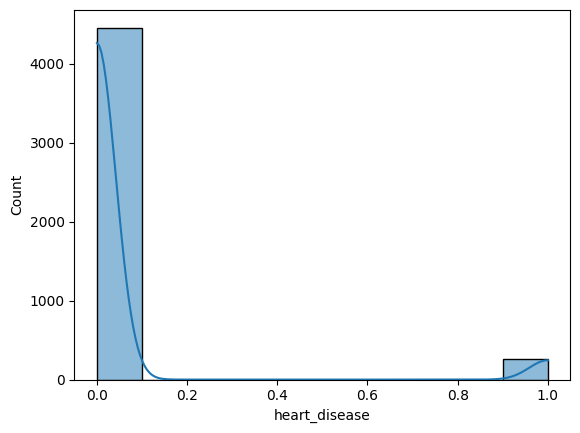

In [138]:
sns.histplot(data['heart_disease'], kde=True, bins=10)

In [132]:
median_imputer = SimpleImputer(strategy="median")

In [134]:
data[['bmi']] = median_imputer.fit_transform(data[['bmi']])

In [135]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
360,0,76.0,1.0,0.0,1,3,1,209.58,28.1,NaN,0


In [136]:
data.isna().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       511
stroke                 0
dtype: int64

In [140]:
knn_imputer = KNNImputer(n_neighbors=21)
data['smoking_status'] = knn_imputer.fit_transform(data[['smoking_status']])

In [141]:
data.isna().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
dtype: int64

In [142]:
data['heart_disease'] = knn_imputer.fit_transform(data[['heart_disease']])

In [143]:
knn_imputer = KNNImputer(n_neighbors=31)
data['hypertension'] = knn_imputer.fit_transform(data[['hypertension']])

In [144]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [145]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4273,0,31.0,0.000000,0.0,0,0,0,70.66,27.2,2.000000,0
950,1,15.0,0.000000,0.0,0,2,1,57.94,41.7,1.381605,0
5042,1,32.0,0.000000,0.0,0,2,0,100.65,26.2,1.000000,0
756,0,18.0,0.097945,0.0,0,2,0,128.97,23.5,0.000000,0
1514,0,35.0,0.000000,0.0,1,0,0,89.11,24.4,2.000000,0
4284,1,69.0,0.097945,1.0,1,2,1,78.11,34.7,1.000000,0
3846,1,8.0,0.000000,0.0,0,4,1,91.53,18.0,0.000000,0
3095,1,32.0,0.000000,0.0,0,2,1,79.54,28.1,0.000000,0
1128,1,52.0,0.000000,0.0,1,0,1,86.06,29.2,1.000000,0
4133,1,4.0,0.000000,0.0,0,4,1,98.56,17.5,0.000000,0


<Axes: >

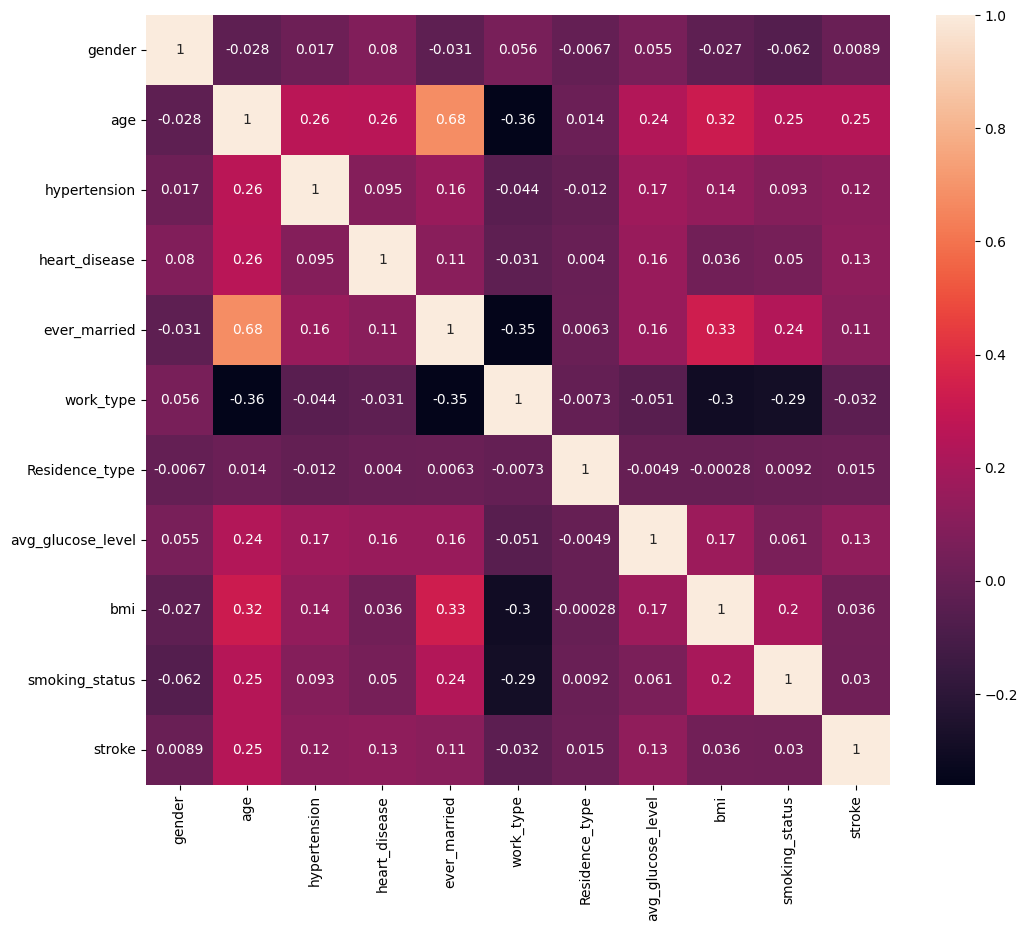

In [146]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [151]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2764,0,24.0,0.0,0.0,1,2,1,85.55,63.3,2.0,0


In [152]:
X = data.iloc[:, :-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0.097945,0.054283,1,2,1,228.69,36.6,1.381605
1,0,61.0,0.000000,0.000000,1,3,0,202.21,28.1,2.000000
2,1,80.0,0.000000,1.000000,1,2,0,105.92,32.5,2.000000
3,0,49.0,0.000000,0.000000,1,2,1,171.23,34.4,3.000000
4,0,79.0,1.000000,0.000000,1,3,0,174.12,24.0,2.000000
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1.000000,0.000000,1,2,1,83.75,28.1,2.000000
5106,0,81.0,0.000000,0.000000,1,3,1,125.20,40.0,2.000000
5107,0,35.0,0.000000,0.000000,1,3,0,82.99,30.6,2.000000
5108,1,51.0,0.000000,0.000000,1,2,0,166.29,25.6,1.000000


In [153]:
y = data.iloc[:, -1:]
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [154]:
X = data.drop(columns=['stroke'])
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0.097945,0.054283,1,2,1,228.69,36.6,1.381605
1,0,61.0,0.000000,0.000000,1,3,0,202.21,28.1,2.000000
2,1,80.0,0.000000,1.000000,1,2,0,105.92,32.5,2.000000
3,0,49.0,0.000000,0.000000,1,2,1,171.23,34.4,3.000000
4,0,79.0,1.000000,0.000000,1,3,0,174.12,24.0,2.000000
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1.000000,0.000000,1,2,1,83.75,28.1,2.000000
5106,0,81.0,0.000000,0.000000,1,3,1,125.20,40.0,2.000000
5107,0,35.0,0.000000,0.000000,1,3,0,82.99,30.6,2.000000
5108,1,51.0,0.000000,0.000000,1,2,0,166.29,25.6,1.000000


In [155]:
y = data['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [156]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [158]:
classifier = LogisticRegression().fit(train_X, train_y)

/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * 

In [162]:
pred_y = classifier.predict(test_X)

/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [164]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.9510763209393346
[[972   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [166]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [170]:
data_stroke = data.loc[data['stroke'] == 1]
data_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.097945,0.054283,1,2,1,228.69,36.6,1.381605,1
1,0,61.0,0.000000,0.000000,1,3,0,202.21,28.1,2.000000,1
2,1,80.0,0.000000,1.000000,1,2,0,105.92,32.5,2.000000,1
3,0,49.0,0.000000,0.000000,1,2,1,171.23,34.4,3.000000,1
4,0,79.0,1.000000,0.000000,1,3,0,174.12,24.0,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0.000000,0.000000,1,2,0,84.96,36.7,0.000000,1
245,0,14.0,0.097945,0.000000,0,4,0,57.93,30.9,0.000000,1
246,0,75.0,0.000000,0.000000,1,3,0,78.80,29.3,1.000000,1
247,1,71.0,1.000000,0.054283,1,3,0,87.80,28.1,0.000000,1


In [174]:
data_no_stroke = data.loc[data['stroke'] == 0]
data_no_stroke = data_no_stroke.sample(300)
data_no_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
557,1,46.0,0.000000,0.0,1,2,1,103.62,40.9,0.0,0
1044,0,79.0,0.000000,0.0,1,0,1,93.89,30.4,2.0,0
1979,1,44.0,0.000000,0.0,0,2,1,103.44,28.0,2.0,0
1695,1,57.0,0.000000,0.0,1,2,0,70.16,25.8,1.0,0
3626,1,0.8,0.097945,0.0,0,4,0,114.54,15.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2829,0,43.0,0.000000,0.0,1,2,0,142.12,28.4,3.0,0
3244,0,45.0,0.000000,0.0,1,2,0,73.87,25.6,0.0,0
3625,1,78.0,0.000000,1.0,1,3,0,206.62,28.0,1.0,0
681,0,16.0,0.000000,0.0,0,2,0,74.98,21.4,2.0,0


In [175]:
new_data = pd.concat([data_no_stroke, data_stroke])
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
557,1,46.0,0.000000,0.000000,1,2,1,103.62,40.9,0.0,0
1044,0,79.0,0.000000,0.000000,1,0,1,93.89,30.4,2.0,0
1979,1,44.0,0.000000,0.000000,0,2,1,103.44,28.0,2.0,0
1695,1,57.0,0.000000,0.000000,1,2,0,70.16,25.8,1.0,0
3626,1,0.8,0.097945,0.000000,0,4,0,114.54,15.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0.000000,0.000000,1,2,0,84.96,36.7,0.0,1
245,0,14.0,0.097945,0.000000,0,4,0,57.93,30.9,0.0,1
246,0,75.0,0.000000,0.000000,1,3,0,78.80,29.3,1.0,1
247,1,71.0,1.000000,0.054283,1,3,0,87.80,28.1,0.0,1


In [179]:
new_data = new_data.sample(frac=1)
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2461,0,67.0,1.000000,0.0,1,2,1,97.06,30.9,2.0,0
55,1,63.0,0.000000,1.0,1,2,0,196.71,36.5,1.0,1
1971,0,78.0,1.000000,0.0,1,3,0,201.07,21.8,0.0,0
35,0,82.0,0.097945,1.0,0,2,0,84.03,26.5,1.0,1
224,1,49.0,0.097945,0.0,0,2,0,104.86,31.9,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2034,1,56.0,0.000000,0.0,0,3,0,87.95,25.2,2.0,0
1136,1,62.0,0.000000,0.0,1,0,1,91.68,26.5,0.0,0
193,1,68.0,1.000000,1.0,1,2,0,271.74,31.1,3.0,1
137,0,76.0,0.000000,0.0,1,2,1,207.28,34.9,0.0,1


In [181]:
X = new_data.drop(columns=['stroke'])
y = new_data['stroke']

In [182]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.7909090909090909
[[45 14]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80        59
           1       0.75      0.82      0.79        51

    accuracy                           0.79       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.79      0.79      0.79       110



/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * 

In [188]:
model = XGBClassifier(max_depth=7, min_child_weight=1, n_estimators=50, n_jobs=-1, learning_rate=0.01)
model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [189]:
y_pred = model.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.7727272727272727
[[49 10]
 [15 36]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        59
           1       0.78      0.71      0.74        51

    accuracy                           0.77       110
   macro avg       0.77      0.77      0.77       110
weighted avg       0.77      0.77      0.77       110

